Importing the Dependencies

In [76]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')
import pickle

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Data Collection and Processing

In [77]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('heart.csv')

In [78]:
# print first 5 rows of the dataset
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [79]:
# print last 5 rows of the dataset
heart_data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [80]:
# number of rows and columns in the dataset
heart_data.shape

(918, 12)

In [81]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [82]:
# checking for missing values
heart_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [83]:
# statistical measures about the data
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [84]:
# checking the distribution of Target Variable
heart_data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [86]:
#finding null values
heart_data.isnull().any().sum()

0

1 --> Defective Heart

0 --> Healthy Heart

In [87]:
#formatting the data(nominal into numeric)
#sex
pd.unique(heart_data['Sex'].values)

def CalculateSex(sex):
 if sex == 'F':
   return 0
 elif sex == 'M':
   return 1

heart_data['Sex']=heart_data['Sex'].apply(CalculateSex)

In [88]:
#ChestPainType
pd.unique(heart_data['ChestPainType'].values)

def CalculateChestPainType(cpType):
 if cpType == 'ATA':
   return 0
 elif cpType == 'NAP':
   return 1
 elif cpType == 'ASY':
   return 2
 elif cpType == 'TA':
   return 3

heart_data['ChestPainType']=heart_data['ChestPainType'].apply(CalculateChestPainType)

In [89]:
#RestingECG
pd.unique(heart_data['RestingECG'].values)

def CalculateRestingECG(ECG):
 if ECG == 'Normal':
   return 0
 elif ECG == 'ST':
   return 1
 elif ECG == 'LVH':
   return 2

heart_data["RestingECG"]=heart_data["RestingECG"].apply(CalculateRestingECG)

In [90]:
#ExerciseAngina
pd.unique(heart_data['ExerciseAngina'].values)

def CalculateExerciseAngina(Ex_Agine):
 if Ex_Agine == 'N':
   return 0
 elif Ex_Agine == 'Y':
   return 1

heart_data["ExerciseAngina"]=heart_data["ExerciseAngina"].apply(CalculateExerciseAngina)

In [91]:
#ST_Slope
pd.unique(heart_data['ST_Slope'].values)

def CalculateST_Slope(slope):
 if slope == 'Up':
   return 0
 elif slope == 'Flat':
   return 1
 elif slope == 'Down':
   return 2

heart_data["ST_Slope"]=heart_data["ST_Slope"].apply(CalculateST_Slope)

In [92]:
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,140,289,0,0,172,0,0.0,0,0
1,49,0,1,160,180,0,0,156,0,1.0,1,1
2,37,1,0,130,283,0,1,98,0,0.0,0,0
3,48,0,2,138,214,0,0,108,1,1.5,1,1
4,54,1,1,150,195,0,0,122,0,0.0,0,0


In [93]:
#getting some boxplots and correlation heatmap for the dataset 

numeric_features = ['Age', 'Sex' ,'Cholesterol','Oldpeak' , 'ST_Slope']
eda_df = heart_data.loc[:, numeric_features].copy()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-p

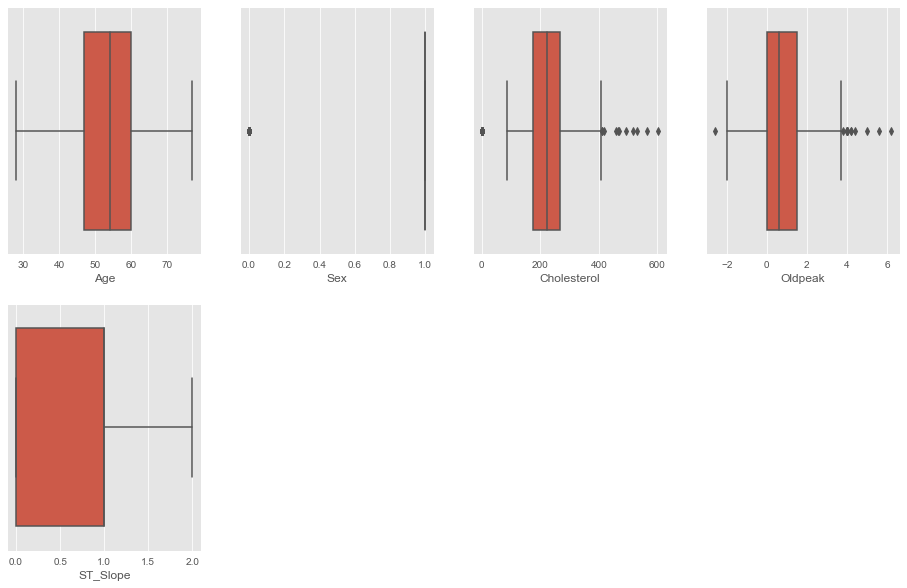

In [94]:
plt.figure(figsize=(16, 10))

for i in range(len(eda_df.columns)):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(eda_df[eda_df.columns[i]])

plt.show()

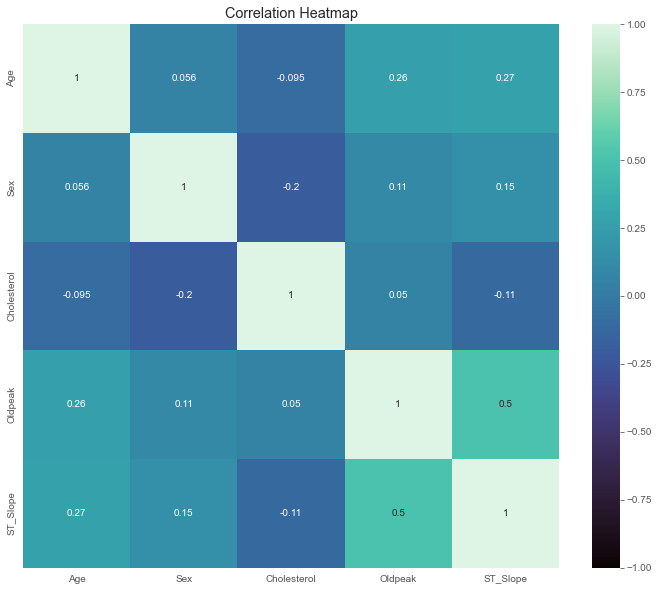

In [95]:
corr = eda_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title("Correlation Heatmap")
plt.show()

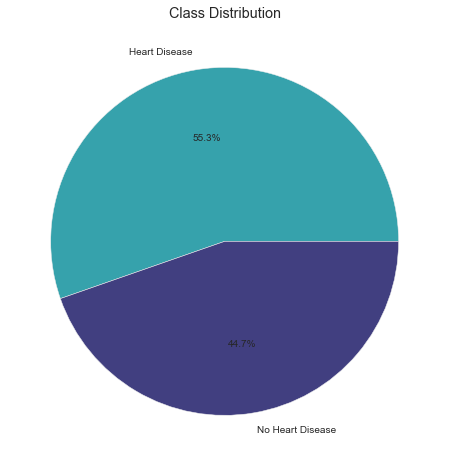

In [96]:
#class distibution pie chart 
plt.figure(figsize=(8, 8))
plt.pie(heart_data['HeartDisease'].value_counts(), labels=["Heart Disease", "No Heart Disease"], autopct='%.1f%%', colors=['#36a2ac', '#413f80'])
plt.title("Class Distribution")
plt.show()

In [97]:
#Save to a csv
heart_data.to_csv("my_heart_dataset.csv",index=False)

Splitting the Features and Target

In [98]:
def onehot_encode(df,column_dict):
    df = df.copy()
    for column,prefix in column_dict.items():
        dummies = pd.get_dummies(df[column],prefix= prefix)
        df = pd.concat([df,dummies],axis=1)
        df =df.drop(column,axis=1)
    return df 

In [99]:
def preprocess_inputs(df,scaler):
    df = df.copy()
    
    #one - hot encode the nominal features 
    nominal_features = ['ChestPainType','ST_Slope']
    df = onehot_encode(df,dict(zip(nominal_features,['CPT','ST_SLP'])))
    
    #split df in X,y
    
    X = df.drop(columns='HeartDisease', axis=1)
    Y = df['HeartDisease']
    #scale X
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
    return X,Y

In [100]:
X,Y = preprocess_inputs(heart_data, RobustScaler()) #changing scalers and try again StandardScaler, MinMaxScaler, RobustScaler

In [101]:
X = heart_data.drop(columns='HeartDisease', axis=1)
Y = heart_data['HeartDisease']

In [102]:
print(X)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              0        140          289          0           0   
1     49    0              1        160          180          0           0   
2     37    1              0        130          283          0           1   
3     48    0              2        138          214          0           0   
4     54    1              1        150          195          0           0   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           0   
914   68    1              2        144          193          1           0   
915   57    1              2        130          131          0           0   
916   57    0              0        130          236          0           2   
917   38    1              1        138          175          0           0   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0  

In [103]:
print(Y)

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64


Splitting the Data into Training data & Test Data

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [105]:
print(X.shape, X_train.shape, X_test.shape)

(918, 11) (734, 11) (184, 11)


Model Training

Logistic Regression

In [106]:
model = LogisticRegression()

In [107]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score

In [108]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [109]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8474114441416893


In [110]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [111]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8369565217391305


SVM model

In [112]:
#2.fitting an SVM model - classification model
svm_model = SVC()
svm_model.fit(X_train,Y_train)

print("Support Vector Machine accuracy :  {:.2f}%".format(svm_model.score(X_test,Y_test)* 100))

Support Vector Machine accuracy :  72.28%


Neural Network

In [113]:
#fitting a neural network
nn_model = MLPClassifier()
nn_model.fit(X_train,Y_train)

print("Nural Network accuracy :  {:.2f}%".format(nn_model.score(X_test,Y_test)* 100))

Nural Network accuracy :  84.24%


k nearest neighbour

In [114]:
#fitting a K-Nearest Neighbour - classification

neighbours = np.arange(1,25)
train_accuracy =np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

for i,k in enumerate(neighbours):
    #Setup a knn classifier with k neighbors
    knn=KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree",n_jobs=-1)
    
    #Fit the model
    knn.fit(X_train,Y_train.ravel())
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, Y_train.ravel())
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, Y_test.ravel())

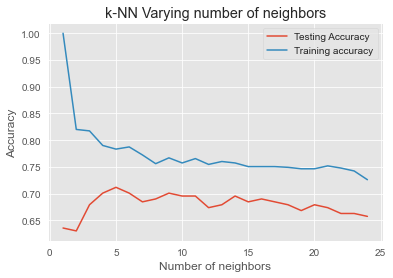

In [115]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbours, test_accuracy, label='Testing Accuracy')
plt.plot(neighbours, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [116]:
idx = np.where(test_accuracy == max(test_accuracy))
x = neighbours[idx]

#k_nearest_neighbours_classification
knn=KNeighborsClassifier(n_neighbors=x[0],algorithm="kd_tree",n_jobs=-1)
knn.fit(X_train,Y_train.ravel())

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1)

In [117]:
# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(knn, filename)
# load the model from disk
knn = joblib.load(filename)

In [118]:
# predicting labels for testing set
knn_predicted_test_labels=knn.predict(X_test)

In [119]:
#scoring knn
knn_accuracy_score = accuracy_score(Y_test,knn_predicted_test_labels)
knn_precison_score = precision_score(Y_test,knn_predicted_test_labels)
knn_recall_score = recall_score(Y_test,knn_predicted_test_labels)
knn_f1_score = f1_score(Y_test,knn_predicted_test_labels)
knn_MCC = matthews_corrcoef(Y_test,knn_predicted_test_labels)
print(knn_accuracy_score, knn_precison_score, knn_recall_score, knn_f1_score, knn_MCC)

0.7119565217391305 0.7247706422018348 0.7745098039215687 0.7488151658767772 0.41335306822659384


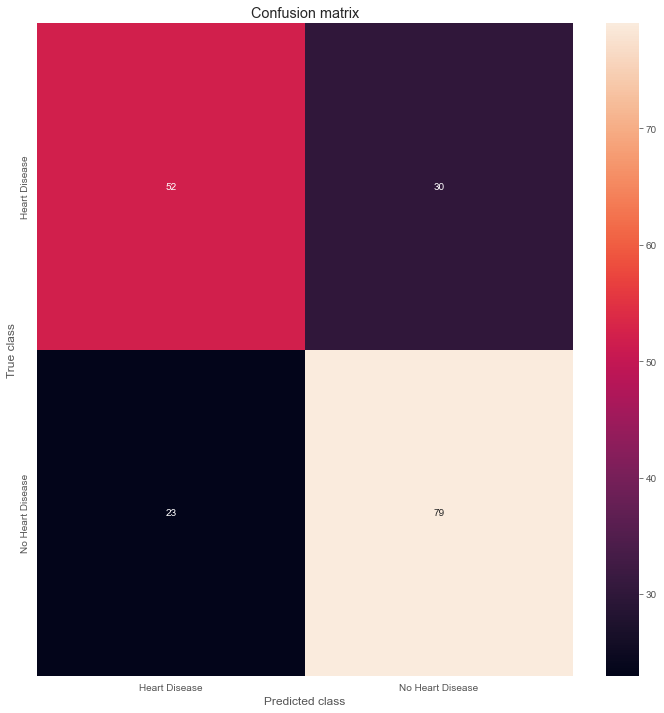

In [120]:
import seaborn as sns
LABELS = ['Heart Disease', 'No Heart Disease']
conf_matrix = confusion_matrix(Y_test, knn_predicted_test_labels)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Building a Predictive System

In [121]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Saving the trained model

In [122]:
import pickle

In [123]:
filename = 'final_heart_disease_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [124]:
# loading the saved model
loaded_model = pickle.load(open('final_heart_disease_model.sav', 'rb'))

In [125]:
for column in X.columns:
  print(column)

Age
Sex
ChestPainType
RestingBP
Cholesterol
FastingBS
RestingECG
MaxHR
ExerciseAngina
Oldpeak
ST_Slope
